<a href="https://colab.research.google.com/github/kapilnchauhan77/Health-App/blob/master/Health_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


#**Data importing**

In [0]:
import os
import cv2
import pickle
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
os.environ['KAGGLE_USERNAME'] = "XXXXX" 
os.environ['KAGGLE_KEY'] = "XXXXX" 
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 1.15G/1.15G [00:21<00:00, 61.1MB/s]
100% 1.15G/1.15G [00:21<00:00, 58.5MB/s]


In [0]:
from zipfile import ZipFile

zf = ZipFile('chest-xray-pneumonia.zip', 'r')
zf.extractall()
zf.close()

In [0]:
zf = ZipFile('chest_xray.zip', 'r')
zf.extractall()
zf.close()

In [0]:
file_path_train = "/content/chest_xray/train"
file_path_test = "/content/chest_xray/test"
file_path_val = "/content/chest_xray/val"
categories = ['NORMAL','PNEUMONIA']
img_size = 299

In [0]:
def get_data(file_path, categories, img_size):
    data = []
    for category in categories:
        c = categories.index(category)
        img_path = os.path.join(file_path, category)
        for img in os.listdir(img_path):
            try:
                a = cv2.imread(os.path.join(img_path, img))
                a = cv2.resize(a, (img_size, img_size))
                data.append([a, c])
            except Exception as e:
                pass
    return data

In [0]:
d_train = get_data(file_path_train, categories, img_size)
d_test = get_data(file_path_test, categories, img_size)
d_val = get_data(file_path_val, categories, img_size)

In [0]:
random.shuffle(d_train)
random.shuffle(d_test)
random.shuffle(d_val)

In [0]:
x_train = []
x_test = []
x_val = []

y_train = []
y_test = []
y_val = []

In [0]:
def spit_x_y(x, y, d):
    for i in d:
        x.append(i[0])
        y.append(i[1])

In [0]:
spit_x_y(x_train, y_train, d_train)
spit_x_y(x_test, y_test, d_test)
spit_x_y(x_val, y_val, d_val)

NORMAL


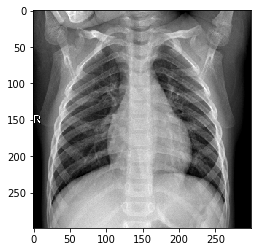

In [13]:
n1 = random.randint(0,800)
plt.imshow(x_train[n1])
print(categories[y_train[n1]])

PNEUMONIA


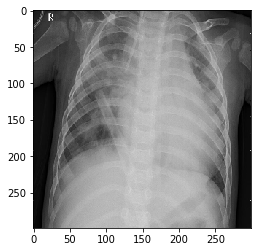

In [14]:
n2 = random.randint(0,800)
plt.imshow(x_train[n2])
print(categories[y_train[n2]])

In [0]:
def nump_con(x):
    x = np.array(x)
    x = x.reshape(-1, img_size, img_size, 3)
    return x

In [0]:
x_train = nump_con(x_train)
x_test = nump_con(x_test)
x_val = nump_con(x_val)

In [0]:
pkl = open('x_train', 'wb')
pickle.dump(x_train, pkl)
pkl.close()

In [0]:
pkl = open('y_train', 'wb')
pickle.dump(y_train, pkl)
pkl.close()

In [0]:
pkl = open('x_test', 'wb')
pickle.dump(x_test, pkl)
pkl.close()

In [0]:
pkl = open('y_test', 'wb')
pickle.dump(y_test, pkl)
pkl.close()

In [0]:
pkl = open('x_val', 'wb')
pickle.dump(x_val, pkl)
pkl.close()

In [0]:
pkl = open('y_val', 'wb')
pickle.dump(y_val, pkl)
pkl.close()

In [23]:
%who

ZipFile	 categories	 cv2	 d_test	 d_train	 d_val	 drive	 file_path_test	 file_path_train	 
file_path_val	 get_data	 img_size	 n1	 n2	 np	 nump_con	 os	 pickle	 
pkl	 plt	 random	 spit_x_y	 x_test	 x_train	 x_val	 y_test	 y_train	 
y_val	 zf	 


In [0]:
del categories, cv2, d_test, d_train, d_val, plt, file_path_test, file_path_train, n1, n2, file_path_val, get_data, img_size, np, nump_con, os, pickle, pkl, spit_x_y, x_test, x_train, x_val, y_test, y_train, y_val, random, ZipFile, drive, zf

In [25]:
%who

Interactive namespace is empty.


#**Machine Learning**

In [0]:
import time
import pickle
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from tensorflow.keras.layers import Dropout, BatchNormalization, Dense, Flatten, Activation

In [0]:
layer_sizes = [32]
activation_layers = [1]
dense_layers = [1]

In [0]:
with open('x_train', 'rb+') as f:
    x_train = pickle.load(f)

with open('y_train', 'rb+') as f:
    y_train = pickle.load(f)

with open('x_test', 'rb+') as f:
    x_test = pickle.load(f)

with open('y_test', 'rb+') as f:
    y_test = pickle.load(f)
    
with open('x_val', 'rb+') as f:
    x_val = pickle.load(f)

with open('y_val', 'rb+') as f:
    y_val = pickle.load(f)
    
y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)

x_train = x_train/255
x_test = x_test/255
x_val = x_val/255

In [29]:
model = tf.keras.applications.inception_v3.InceptionV3(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
end = model.get_layer('avg_pool')
for i in range(model.layers.index(end)):
	model.layers[i].trainable = False

rmodel = Model(model.input, end.output)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
96116736/96112376 [==============================] - 3s 0us/step


In [0]:
import os
os.mkdir('models')
os.mkdir('logs')

In [31]:
!pip install -q tf-nightly-2.0-preview
%load_ext tensorboard

     |████████████████████████████████| 91.4MB 476kB/s 
     |████████████████████████████████| 3.8MB 64.4MB/s 
     |████████████████████████████████| 450kB 69.5MB/s 


In [58]:
%tensorboard --logdir=logs/ 

In [36]:
for layer_size in layer_sizes:
  for activation_layer in activation_layers:
    for dense_layer in dense_layers:

      NM = f"layer_size-{layer_size}, activation_layers-{activation_layer}, n_dense_layers-{dense_layer}-{time.time()}"
      tensorboard = TensorBoard(log_dir=f'logs/{NM}')

      model = Sequential()
      model.add(rmodel)

      model._layers[1].trainable = False

      for j in range(activation_layer):
        model.add(Activation('relu'))
    
      model.add(Flatten())

      for k in range(dense_layer):
        model.add(Dense(layer_size))
        model.add(Activation('relu'))
        model.add(Dropout(0.4))

      model.add(Dense(2))
      model.add(Activation("softmax"))

      opt = tf.keras.optimizers.Adam(lr=1e-3, decay=1e-6)

      model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

      file_path = "Health_app-{epoch:0.2f}-{val_loss:.3f}"
      model_checkpoint = ModelCheckpoint(f'models/{file_path}', monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

      model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test), callbacks=[tensorboard, model_checkpoint])

Train on 5216 samples, validate on 624 samples
Epoch 1/100
5184/5216 [============================>.] - ETA: 0s - loss: 0.3692 - acc: 0.8351
Epoch 00001: saving model to models/Health_app-1.00-0.973
5216/5216 [==============================] - 43s 8ms/sample - loss: 0.3681 - acc: 0.8357 - val_loss: 0.9727 - val_acc: 0.6298
Epoch 2/100
5184/5216 [============================>.] - ETA: 0s - loss: 0.2438 - acc: 0.9055
Epoch 00002: saving model to models/Health_app-2.00-1.023
5216/5216 [==============================] - 33s 6ms/sample - loss: 0.2435 - acc: 0.9059 - val_loss: 1.0227 - val_acc: 0.6346
Epoch 3/100
5184/5216 [============================>.] - ETA: 0s - loss: 0.2189 - acc: 0.9090
Epoch 00003: saving model to models/Health_app-3.00-1.294
5216/5216 [==============================] - 33s 6ms/sample - loss: 0.2190 - acc: 0.9087 - val_loss: 1.2939 - val_acc: 0.6250
Epoch 4/100
5184/5216 [============================>.] - ETA: 0s - loss: 0.2019 - acc: 0.9196
Epoch 00004: saving model

In [40]:
%who

Activation	 BatchNormalization	 Dense	 Dropout	 Flatten	 MediaFileUpload	 Model	 ModelCheckpoint	 NM	 
Sequential	 TensorBoard	 activation_layer	 activation_layers	 auth	 build	 dense_layer	 dense_layers	 destination_name	 
drive_service	 end	 extension_zip	 f	 file_path	 filename	 files	 folders_or_files_to_save	 i	 
j	 k	 layer_size	 layer_sizes	 model	 model_checkpoint	 np	 opt	 os	 
path_to_file	 pickle	 rmodel	 save_file_to_drive	 tensorboard	 tf	 time	 x_test	 x_train	 
x_val	 y_test	 y_train	 y_val	 zip_file	 


In [0]:
del model

In [0]:
model = tf.keras.applications.inception_v3.InceptionV3(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
end = model.get_layer('avg_pool')
for i in range(model.layers.index(end)):
	model.layers[i].trainable = False

rmodel = Model(model.input, end.output)

In [0]:
model = Sequential()
model.add(rmodel)
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(layer_size))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(2))
model.add(Activation("softmax"))
model.load_weights("/content/Health_app-29.00-0.699")
opt = tf.keras.optimizers.Adam(lr=1e-3, decay=1e-6)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [52]:
scores = model.evaluate(x_val, y_val, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

16/16 [==============================] - 2s 99ms/sample - loss: 0.5689 - acc: 0.7500
acc: 75.00%


Predicted: NORMAL
Real value: NORMAL


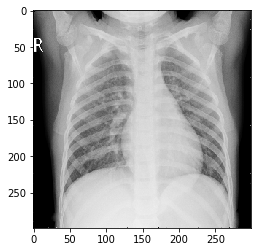

In [65]:
import random
import numpy as np
import matplotlib.pyplot as plt
n1 = random.randint(0,9)
plt.imshow(x_val[n1])
print(f'Predicted: {categories[np.argmax(model.predict(x_val)[n1])]}')
print(f'Real value: {categories[y_val[n1]]}')

Predicted: PNEUMONIA
Real value: PNEUMONIA


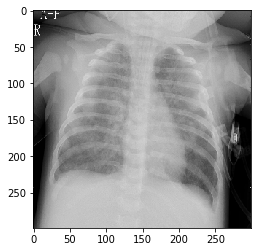

In [66]:
n2 = random.randint(0,9)
plt.imshow(x_val[n2])
print(f'Predicted: {categories[np.argmax(model.predict(x_val)[n2])]}')
print(f'Real value: {categories[y_val[n2]]}')

##Let us just do it for all avilable in validation!

Predicted: NORMAL
Real value: NORMAL


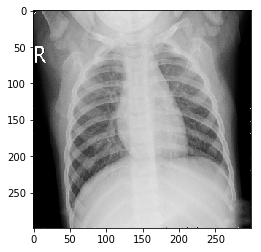

Predicted: PNEUMONIA
Real value: PNEUMONIA


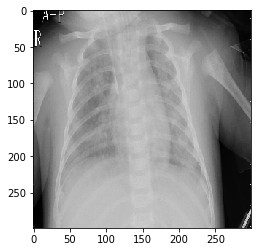

Predicted: NORMAL
Real value: NORMAL


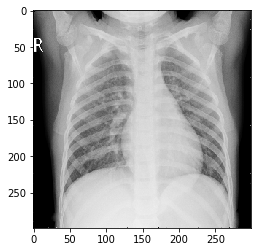

Predicted: NORMAL
Real value: PNEUMONIA


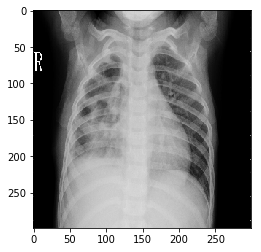

Predicted: PNEUMONIA
Real value: PNEUMONIA


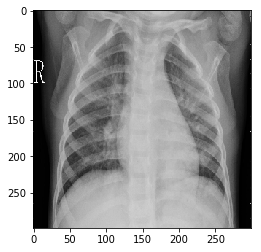

Predicted: PNEUMONIA
Real value: NORMAL


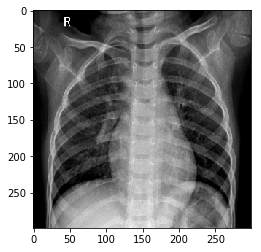

Predicted: PNEUMONIA
Real value: PNEUMONIA


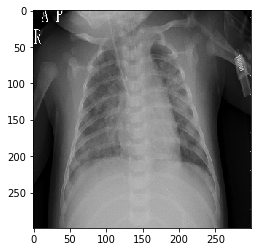

Predicted: NORMAL
Real value: NORMAL


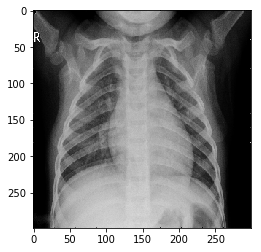

Predicted: PNEUMONIA
Real value: PNEUMONIA


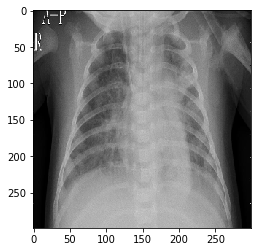

In [67]:
for i in range(0,9):
  plt.imshow(x_val[i])
  print(f'Predicted: {categories[np.argmax(model.predict(x_val)[i])]}')
  print(f'Real value: {categories[y_val[i]]}')
  plt.show()